# Задача 2. Линейная регрессия, метод градиентного спуска
***Дедлайн*** : 29.10.2023, 23:59  
***Основной полный балл*** : 5  
***Максимум баллов*** : 10  

## Задача

- [x] Самостоятельно реализовать функцию **gradient_descent(X, y)**, которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал **методом градиентного спуска (Batch Gradient Descent, GD)** и возвращая вектор весов **w**. В качестве функционала можно выбрать, например, функцию ошибок **MSE** + $L_2$-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.
- [x] Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целевого признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлимый результат. В крайнем случае взять данные для предсказания стоимости машин [тут](https://github.com/rustam-azimov/ml-course-itmo/tree/main/data/car_price) (целевой признак для предсказания --- **price**).
- [x] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [x] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.
- [x] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [x] Случайным образом разбить данные на **обучающую** и **тестовую** выборки, используя методы существующих библиотек.
- [x] При обучении моделей использовать **масштабирование данных**.
- [x] Обучить модель на обучающей выборке, используя функцию **gradient_descent(X, y)**. Оценить качество модели на обучающей и тестовой выборках, используя **MSE**, **RMSE** и $R^2$.
- [x] Обучить модель, используя существующую библиотеку. Например, в **sklearn** для $L_2$-регуляризатора можно использовать **Ridge**. Сравнить качество с Вашей реализацией.
- [x] Повторить тоже самое, но используя **кросс-валидацию**.
- [x] Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, **E** --- мат. ожидание и **STD** --- стандартное отклонение. Сделать выводы.
- [x] * (+2 балла) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя **Recursive Feature Elimination (RFE)** из **sklearn**.
- [x] * (+1 балл) Во все ваши реализации добавить возможность настройки нужных **гиперпараметров**, а в процессе обучения **всех** моделей осуществить подбор оптимальных значений этих гиперпараметров.
- [x] * (+1 балл) Также самостоятельно реализовать **метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD)**, обучить модели и добавить их во все сравнения.
- [x] * (+1 балл) Также самостоятельно реализовать **метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent)**, обучить модели и добавить их во все сравнения.

 ##  Набор данных Carseats.csv
 https://www.kaggle.com/code/gomes555/carseats-eda-and-basic-decision-tree
 
- `Sales`	- Удельный объем продаж (в тысячах) на каждом предприятии
- `CompPrice`	- Цена, взимаемая конкурентом в каждом месте
- `Income` - Уровень дохода населения (в тысячах долларов)
- `Advertising` - Местный рекламный бюджет компании в каждом месте (в тысячах долларов)
- `Population` - Численность населения в регионе (в тысячах человек)
- `Price` - Цена, которую компания взимает за автокресла на каждом объекте
- `ShelveLoc` - Коэффициент с уровнями "Плохо", "Хорошо" и "Средне", указывающий на качество расположения полок для автокресел на каждой площадке
- `Age` - Средний возраст местного населения
- `Education`	- Уровень образования на каждой площадке
- `Urban` - Фактор с уровнями No и Yes, указывающий, в какой местности находится магазин - городской или сельской
- `US` - Фактор с уровнями "Нет" и "Да", указывающий, находится ли магазин в США или нет
 
 Будем использовать ***Sales*** как целевую переменную для предсказаний.

In [762]:
import random

import numpy as np
import pandas as pd

from scipy.stats import shapiro
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns


## Подключение данных, EDA

In [763]:
df = pd.read_csv('./Carseats.csv')

In [764]:
df.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [765]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [766]:
df.Education.unique()

array([17, 10, 12, 14, 13, 16, 15, 18, 11])

In [767]:
# Education - категориальная переменная
df['Education'] = df['Education'].astype(str)

In [768]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

- ***Категориальные переменные*** : ShelveLoc, Urban, US, Education  
- ***Непрерывные переменные*** : CompPrice, Income, Advertising, Population, Price, Age
- ***Target*** : Sales

array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'CompPrice'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Advertising'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >, <Axes: >]],
      dtype=object)

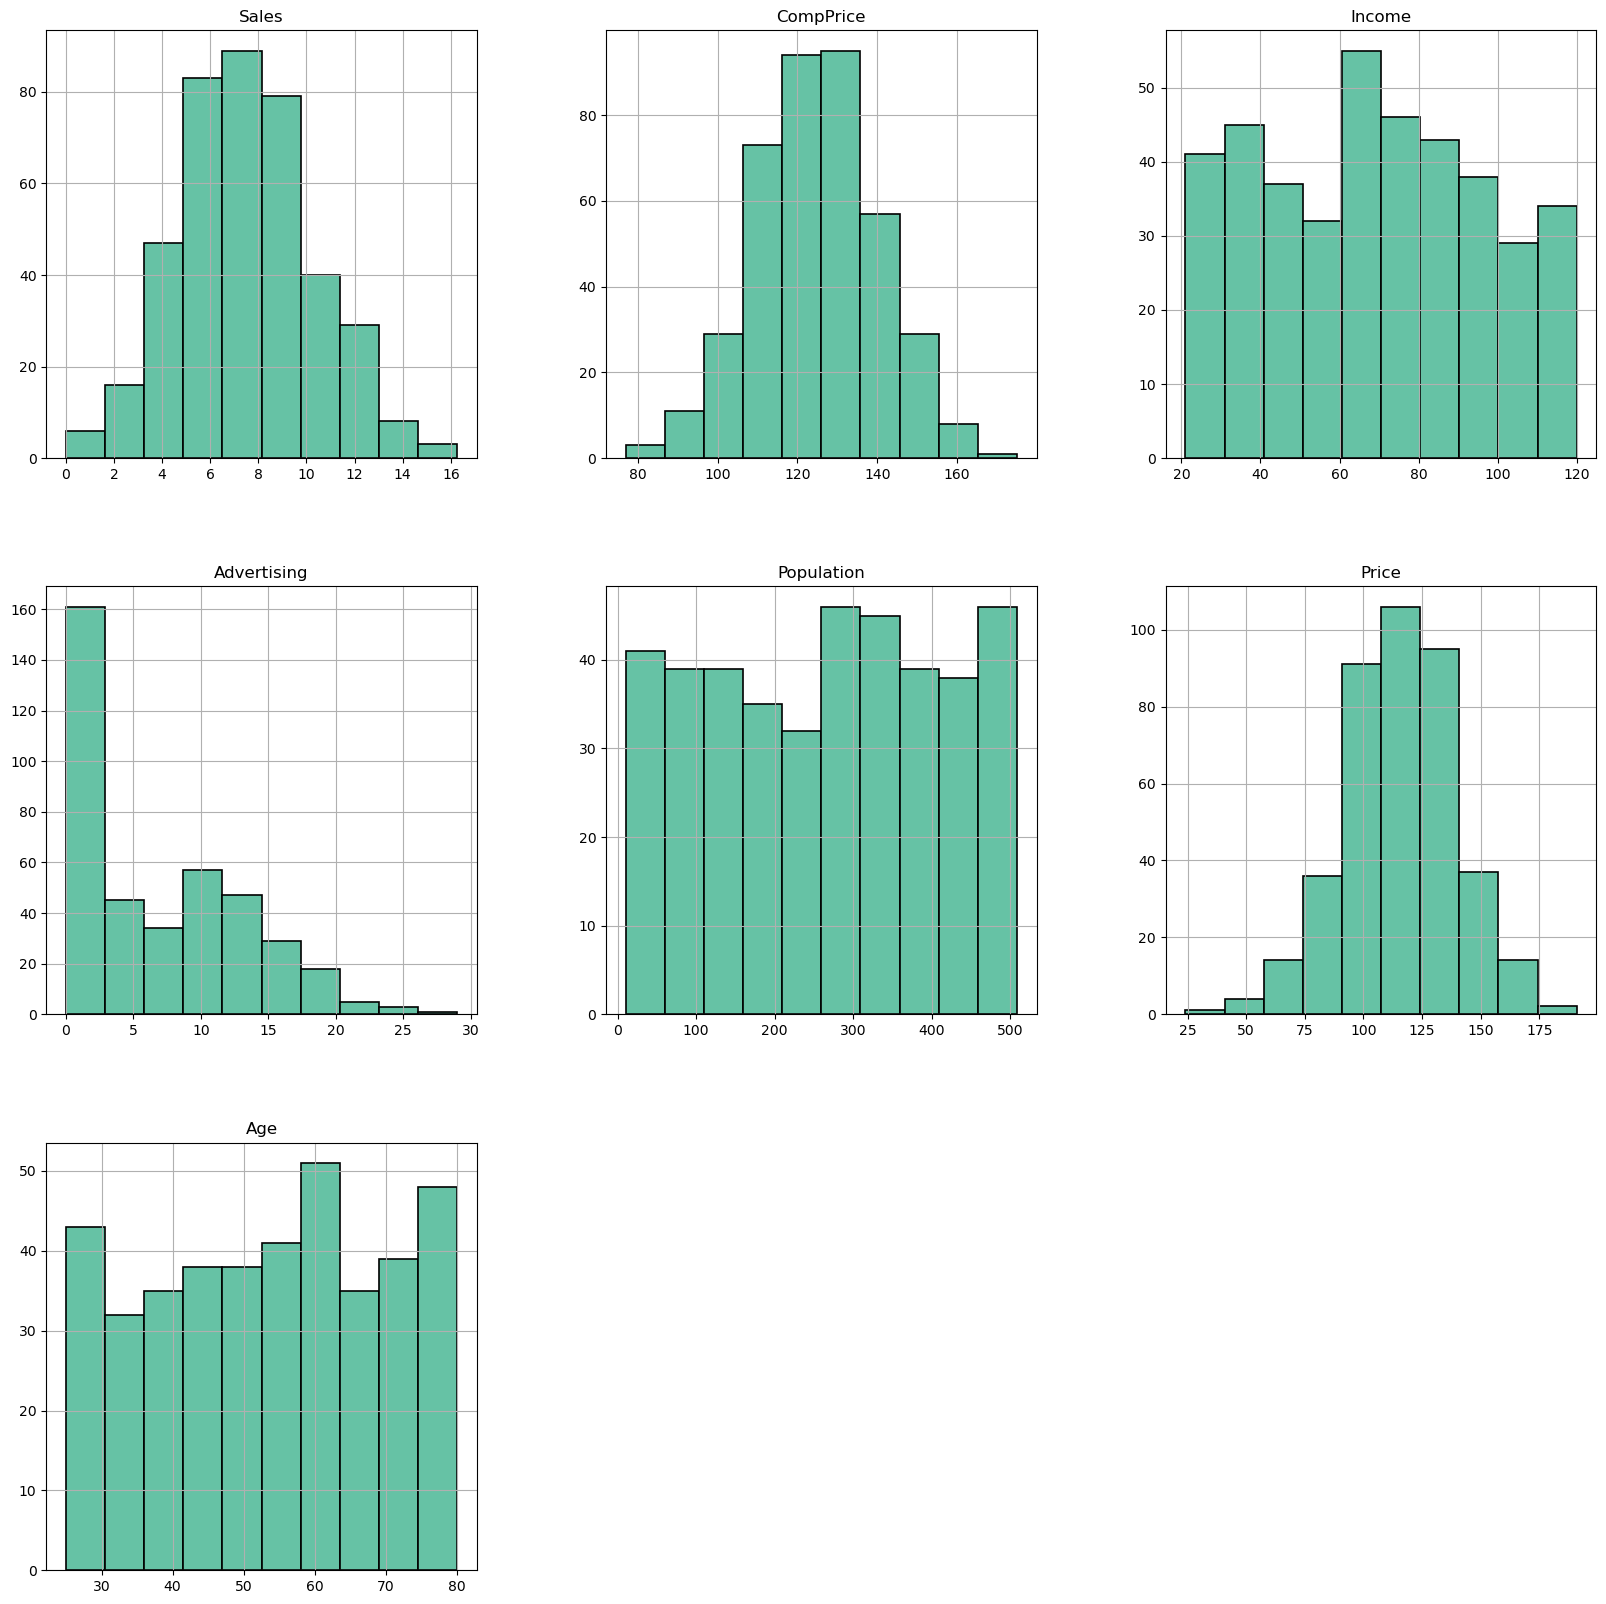

In [769]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))

Зависимая Sales, CompPrice и Price распределены нормально в отличие от остальных.  
Также наблюдается зависимость между Sales и Price.

In [770]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    object 
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [771]:
# Категориальные переменные
cat_cols = ['Education', 'ShelveLoc', 'Urban', 'US']
for col in cat_cols:
    print("----------------------------------------")
    print(f"Feature Name {col} : \n{df[col].value_counts()}")

----------------------------------------
Feature Name Education : 
Education
17    49
12    49
10    48
11    48
16    47
13    43
14    40
18    40
15    36
Name: count, dtype: int64
----------------------------------------
Feature Name ShelveLoc : 
ShelveLoc
Medium    219
Bad        96
Good       85
Name: count, dtype: int64
----------------------------------------
Feature Name Urban : 
Urban
Yes    282
No     118
Name: count, dtype: int64
----------------------------------------
Feature Name US : 
US
Yes    258
No     142
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='Sales'>

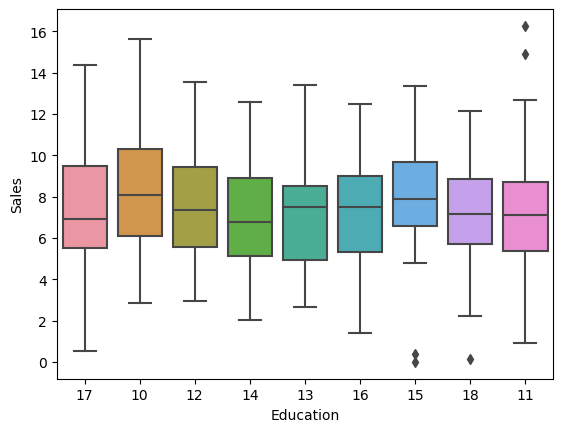

In [772]:
sns.boxplot(x="Education", y="Sales", data=df)

/var/folders/s0/shpl04y5065ddrdrt0mnrgd40000gn/T/ipykernel_59171/2512398320.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'].loc[df['ShelveLoc'] == 'Medium'], color="dodgerblue", label="Medium")
/var/folders/s0/shpl04y5065ddrdrt0mnrgd40000gn/T/ipykernel_59171/2512398320.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147

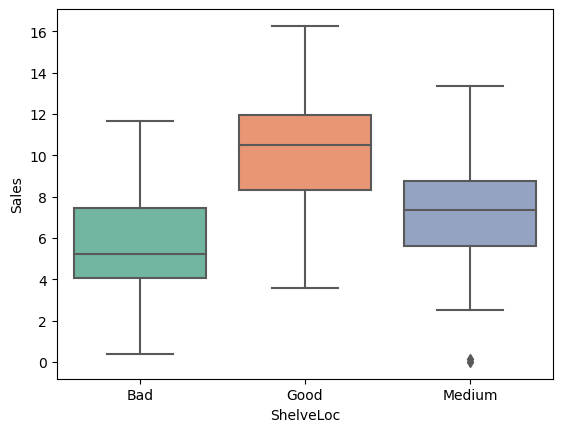

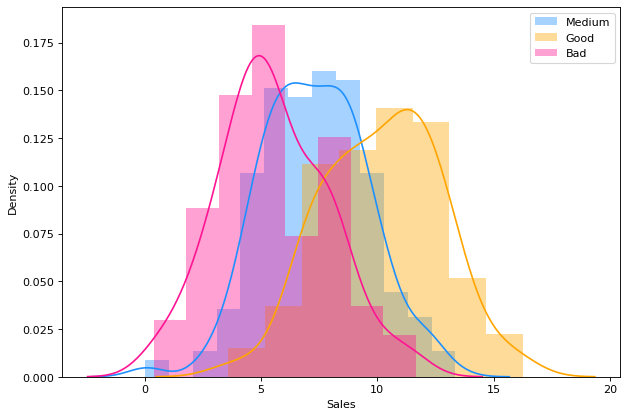

In [773]:
#ShelveLoc
sns.boxplot(x="ShelveLoc", y="Sales", data=df)
plt.figure(figsize=(9,6), dpi= 80)
sns.distplot(df['Sales'].loc[df['ShelveLoc'] == 'Medium'], color="dodgerblue", label="Medium")
sns.distplot(df['Sales'].loc[df['ShelveLoc'] == 'Good'], color="orange", label="Good")
sns.distplot(df['Sales'].loc[df['ShelveLoc'] == 'Bad'], color="deeppink", label="Bad")
plt.legend()

/var/folders/s0/shpl04y5065ddrdrt0mnrgd40000gn/T/ipykernel_59171/1239267505.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'].loc[df['Urban'] == 'Yes'], color="dodgerblue", label="Yes")
/var/folders/s0/shpl04y5065ddrdrt0mnrgd40000gn/T/ipykernel_59171/1239267505.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457a

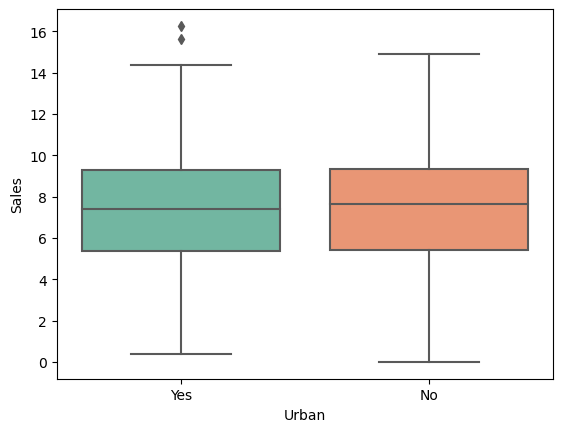

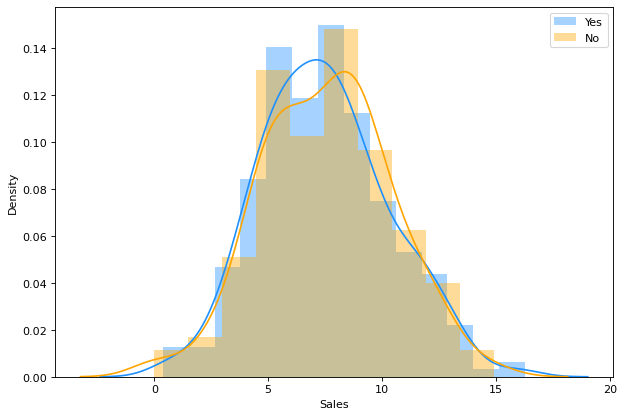

In [774]:
#Urban
sns.boxplot(x="Urban", y="Sales", data=df)
plt.figure(figsize=(9,6), dpi= 80)
sns.distplot(df['Sales'].loc[df['Urban'] == 'Yes'], color="dodgerblue", label="Yes")
sns.distplot(df['Sales'].loc[df['Urban'] == 'No'], color="orange", label="No")
plt.legend()

/var/folders/s0/shpl04y5065ddrdrt0mnrgd40000gn/T/ipykernel_59171/791428804.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'].loc[df['US'] == 'Yes'], color="dodgerblue", label="Yes")
/var/folders/s0/shpl04y5065ddrdrt0mnrgd40000gn/T/ipykernel_59171/791428804.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

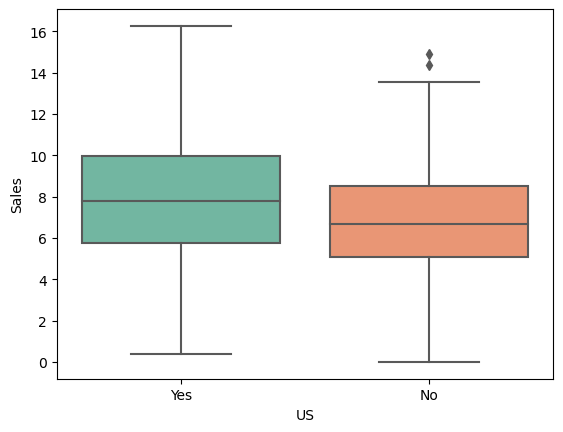

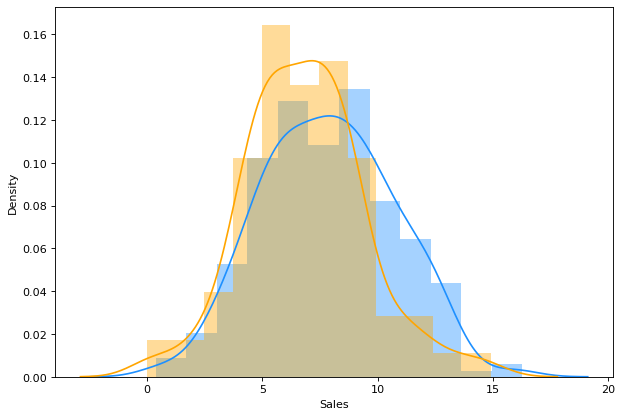

In [775]:
#US
sns.boxplot(x="US", y="Sales", data=df)
plt.figure(figsize=(9,6), dpi= 80)
sns.distplot(df['Sales'].loc[df['US'] == 'Yes'], color="dodgerblue", label="Yes")
sns.distplot(df['Sales'].loc[df['US'] == 'No'], color="orange", label="No")
plt.show()

- `Shelveloc` разделяет `Sales` на три вида и имеет выбросы только в случае с Medium категорией.  
- Категории `Urban` имеют практически равные средние значения, в данном случае не очень информативный признак.  
- Магазины в `US` показывают более высокие продажи, чем другие.  
- Значения в `Education` различаются в зависимости от класса.

In [776]:
df.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### Преобразуем категориальные признаки

In [777]:
df_dummy = pd.get_dummies(df[['ShelveLoc']], drop_first=True).astype('int')
df = pd.concat([df.reset_index(drop=True), df_dummy], axis=1)

df_dummy = pd.get_dummies(df[['Education']], drop_first=True).astype('int')
df = pd.concat([df.reset_index(drop=True), df_dummy], axis=1)

df_dummy = pd.get_dummies(df[['Urban']], drop_first=True).astype('int')
df = pd.concat([df.reset_index(drop=True), df_dummy], axis=1)

df_dummy = pd.get_dummies(df[['US']], drop_first=True).astype('int')
df = pd.concat([df.reset_index(drop=True), df_dummy], axis=1)

df = df.drop(columns = ['ShelveLoc', 'Education','Urban', 'US'], axis=1)

<Axes: >

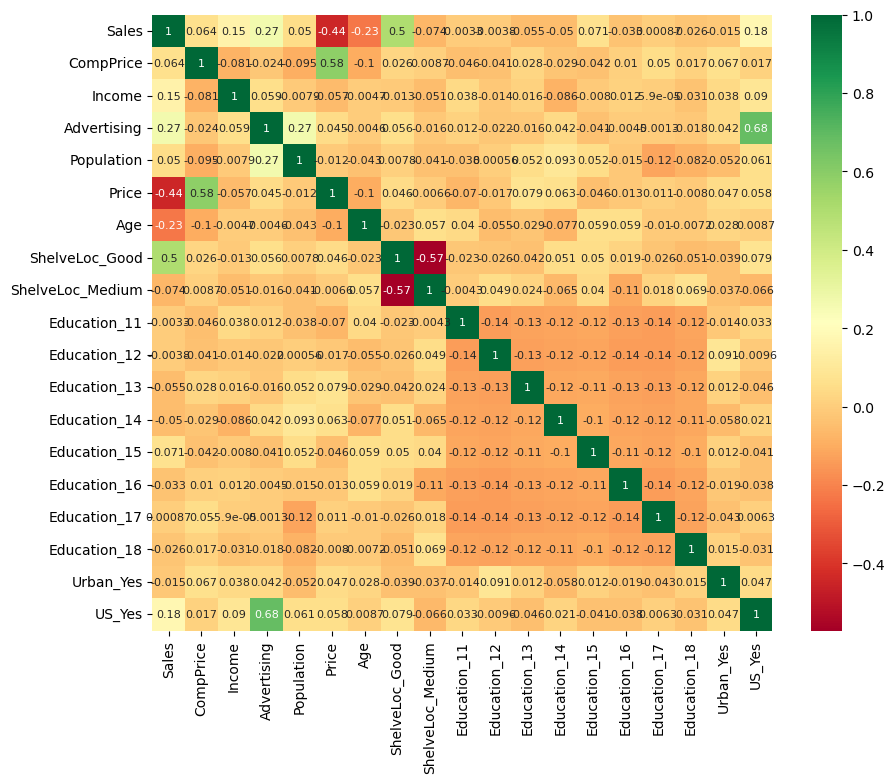

In [778]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":8})

Наиболее заметна корреляция между Рекламой и Страной,  
между Выставляемой ценой и Ценой у конкурентов,
и также обратная корреляция между Полками среднего качества и хорошего,  
но т.к. они все меньше 0.8, мы не будем избавляться от данных признаков.

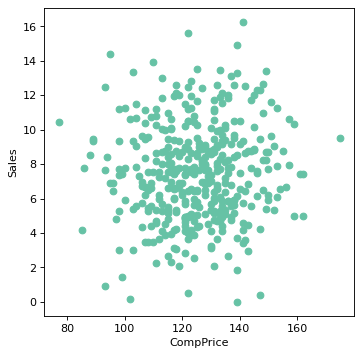

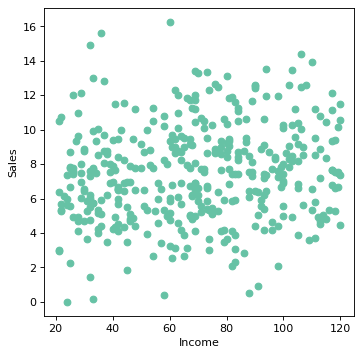

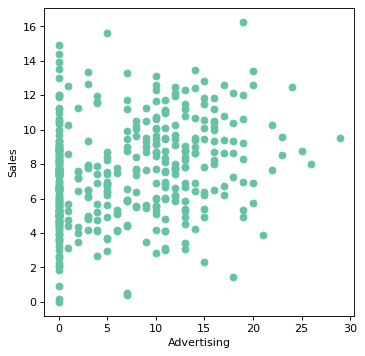

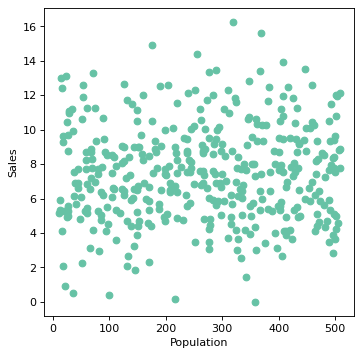

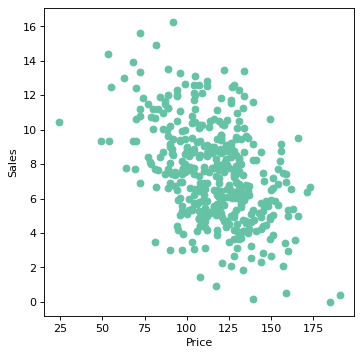

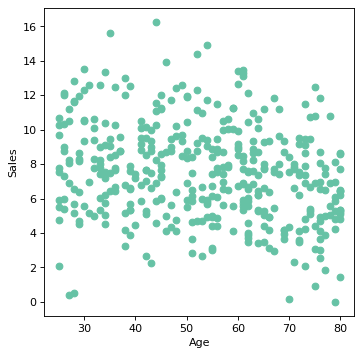

In [779]:
# Visulazing the distibution of the data for every feature with Sales
cont_cols = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age']
for col in cont_cols:
    plt.figure(figsize=(5,5), dpi= 80)
    plt.scatter(x=col, y='Sales', data=df)
    plt.xlabel(f"{col}")
    plt.ylabel('Sales')
    plt.show()

In [780]:
df.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,0,0,0,0,0,0,0,0,1,0,1,1
1,11.22,111,48,16,260,83,65,1,0,0,0,0,0,0,0,0,0,1,1
2,10.06,113,35,10,269,80,59,0,1,0,1,0,0,0,0,0,0,1,1
3,7.40,117,100,4,466,97,55,0,1,0,0,0,1,0,0,0,0,1,1
4,4.15,141,64,3,340,128,38,0,0,0,0,1,0,0,0,0,0,1,0


Вместо двух переменных `ComPrice` и `Price` оставим их разницу.  
Покажем, что они действительно сильно коррелируют

In [781]:
# Вместо двух переменных `ComPrice` и `Price` оставим их разницу
diff = df['Price'].values - df['CompPrice'].values
df.insert(6, 'PriceDiff', diff)

corr_df = df[['Sales', 'PriceDiff']]
corr_df.corr()

,Sales,PriceDiff
Sales,1.000000,-0.597922
PriceDiff,-0.597922,1.000000


In [782]:
df = df.drop(columns = ['Price', 'CompPrice'], axis=1)

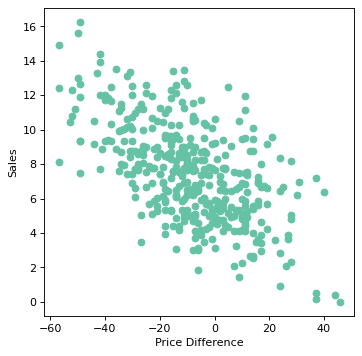

In [783]:
plt.figure(figsize=(5,5), dpi= 80)
plt.scatter(x='PriceDiff', y='Sales', data=df)
plt.xlabel('Price Difference')
plt.ylabel('Sales')
plt.show()

Логично, что если цена у конкурентов больше чем у нас, то наши продажи растут,  
и наоборот, если у нас цена больше чем у конкурентов - падают.

### Разбиваем данные на подвыборки

In [784]:
df.head(5)

,Sales,Income,Advertising,Population,PriceDiff,Age,ShelveLoc_Good,ShelveLoc_Medium,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18,Urban_Yes,US_Yes
0,9.50,73,11,276,-18,42,0,0,0,0,0,0,0,0,1,0,1,1
1,11.22,48,16,260,-28,65,1,0,0,0,0,0,0,0,0,0,1,1
2,10.06,35,10,269,-33,59,0,1,0,1,0,0,0,0,0,0,1,1
3,7.40,100,4,466,-20,55,0,1,0,0,0,1,0,0,0,0,1,1
4,4.15,64,3,340,-13,38,0,0,0,0,1,0,0,0,0,0,1,0


In [785]:
X = df.drop(['Sales'], axis=1)
y = df.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Масштабируем признаки с помощью StandartScaler

In [786]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
X_train.head(5)

,Income,Advertising,Population,PriceDiff,Age,ShelveLoc_Good,ShelveLoc_Medium,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18,Urban_Yes,US_Yes
0,-1.399394,-1.017314,-1.333178,-1.682093,0.122241,-0.529150,0.916013,-0.393998,-0.372545,-0.333333,-0.321634,-0.291111,-0.361583,2.572751,-0.327516,0.635223,-1.391323
1,-1.362984,-1.017314,0.172954,-0.140687,1.589130,-0.529150,0.916013,-0.393998,-0.372545,-0.333333,-0.321634,-0.291111,-0.361583,-0.388689,-0.327516,0.635223,-1.391323
2,-1.035294,1.533003,1.545208,-1.575789,0.061120,-0.529150,0.916013,-0.393998,-0.372545,-0.333333,-0.321634,-0.291111,-0.361583,2.572751,-0.327516,-1.574249,0.718740
3,-1.472214,0.632891,-1.587547,-1.044270,0.000000,1.889822,-1.091687,-0.393998,-0.372545,-0.333333,-0.321634,-0.291111,-0.361583,-0.388689,3.053290,0.635223,0.718740
4,-1.690674,-1.017314,1.505044,-0.140687,0.672324,-0.529150,0.916013,2.538082,-0.372545,-0.333333,-0.321634,-0.291111,-0.361583,-0.388689,-0.327516,-1.574249,-1.391323


## Отбор наилучших признаков с помощью рекурсивного исключения признаков и кросс-валидации (RFECV)

In [787]:
rfecv = RFECV(estimator = LinearRegression())
rfecv.fit(X_train, y_train)

print("Оптимальное количество признаков: ", rfecv.n_features_)
print("Сами признаки: ", X_train.columns[rfecv.support_])

Оптимальное количество признаков:  6
Сами признаки:  Index(['Income', 'Advertising', 'PriceDiff', 'Age', 'ShelveLoc_Good',
       'ShelveLoc_Medium'],
      dtype='object')


In [788]:
X_train = X_train.drop(columns=['Population'])
X_test = X_test.drop(columns=['Population'])

In [789]:
X_train = X_train.drop(columns=X_train.iloc[:, 6:])
X_test = X_test.drop(columns=X_test.iloc[:, 6:])

X_train.head(5)

,Income,Advertising,PriceDiff,Age,ShelveLoc_Good,ShelveLoc_Medium
0,-1.399394,-1.017314,-1.682093,0.122241,-0.529150,0.916013
1,-1.362984,-1.017314,-0.140687,1.589130,-0.529150,0.916013
2,-1.035294,1.533003,-1.575789,0.061120,-0.529150,0.916013
3,-1.472214,0.632891,-1.044270,0.000000,1.889822,-1.091687
4,-1.690674,-1.017314,-0.140687,0.672324,-0.529150,0.916013


In [790]:
alpha_grid = np.logspace(-6, 6, 10)
tol_grid = np.logspace(-6, 6, 10)

searcher = GridSearchCV(
    Ridge(),
    [{"alpha": alpha_grid, "tol": tol_grid}],
    scoring="neg_root_mean_squared_error",
    cv=5,
)
searcher.fit(X_train, y_train)

optimal_alpha = searcher.best_params_["alpha"]
optimal_tol = searcher.best_params_["tol"]

print("Best alpha = %.4f" % optimal_alpha)
print("Best tol = %.4f" % optimal_tol)

Best alpha = 0.2154
Best tol = 0.0000


## Градиентный спуск по модели линейной регрессии. Реализация в классе LinearGrad

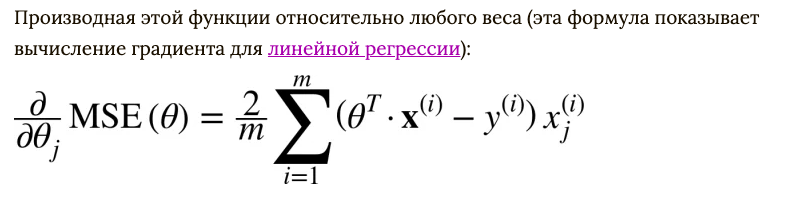

In [791]:
class LinearGrad(object):
    
    def __init__(self, to_lim = 0.0001, alpha = 1, step_coef = 0.01, n_iter = 1000):
        self.w = None
        self.to_lim = to_lim         # останавливаемся, если ошибка перестала изменяться
        self.alpha = alpha
        self.step_coef = step_coef
        self.n_iter = n_iter
        self.costs = []
        
    def linear_model(self, x, w):
        return np.matmul(x, w)
    
    def cost(self, w, x, y, alpha_reg):
        y_pred = self.linear_model(x, w)
        return sum((y - y_pred) ** 2) / len(y) + alpha_reg * sum(w ** 2)        
        
    def fit(self, X, y):
        n = X.shape[1]               #cols
        m = X.shape[0]               #rows
        w = np.random.randn(n + 1, )
        X_new = np.copy(X)
        X_new = np.insert(X_new, 0, np.ones(m), axis=1)
        
        
        while True:
            y_pred = X_new.dot(w)
            error = y_pred - y
            curr_cost = self.cost(w, X_new, y, self.alpha)
            grad = (1 / m) * (X_new.T.dot(error) + self.alpha * w)
            w = w - self.step_coef * grad
            self.costs.append(curr_cost)
            if len(self.costs) >= 2 and abs(self.costs[-1] - self.costs[-2]) < self.to_lim:
                break
        self.w = w
        return w

    def predict(self, X):
        return X.dot(self.w[1:])+self.w[0]
            
    def statistics(self, y, y_pred):
        stat ={'MSE' : mean_squared_error(y, y_pred),
               'RMSE': np.sqrt(mean_squared_error(y, y_pred)),
               'R2'  : r2_score(y, y_pred)
              }
        return stat

### Применение LinearGrad. Обучение модели

In [792]:
lrgd = LinearGrad(optimal_tol, optimal_alpha, step_coef = 0.01, n_iter = 1000)

In [793]:
lrgd.fit(X_train, y_train)
lrgd.w

array([ 7.56293942,  0.39860164,  0.77720201, -1.78367594, -0.79925037,
        2.02072825,  1.01324644])

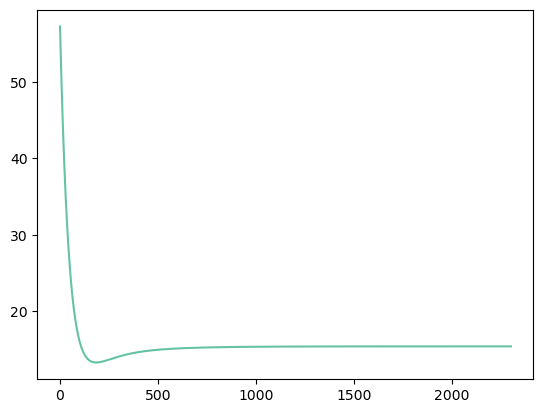

In [794]:
plt.plot(lrgd.costs)

In [795]:
y_pred = lrgd.predict(X_train)
lrgd.statistics(y_train, y_pred)

{'MSE': 0.9866272019529927,
 'RMSE': 0.9932910962819473,
 'R2': 0.8742314972210249}

In [796]:
y_pred_test = lrgd.predict(X_test)
lrgd.statistics(y_test, y_pred_test)

{'MSE': 1.1802489107811178,
 'RMSE': 1.0863926135523556,
 'R2': 0.8577404429611581}

### Применение Ridge регрессии из Sklearn для проверки полученных значений

In [797]:
ridge = Ridge(alpha = optimal_alpha, tol = optimal_tol)
ridge.fit(X_train, y_train)
ry_pred = ridge.predict(X_train)
ry_test_pred = ridge.predict(X_test)

In [798]:
print('coefs :', ridge.intercept_, ridge.coef_)

coefs : 7.56803125 [ 0.3986197   0.77718008 -1.78367605 -0.79927551  2.02090923  1.01342766]


In [799]:
lrgd.statistics(y_train, ry_pred)

{'MSE': 0.9866004938154365,
 'RMSE': 0.9932776519259036,
 'R2': 0.8742349017921394}

In [800]:
lrgd.statistics(y_test, ry_test_pred)

{'MSE': 1.1804256023231603, 'RMSE': 1.0864739308069753, 'R2': 0.85771914570744}

Значения схожи с полученными в LinearGrad, разработанная функция выполняет заложенные требования.  
$R^2$ приближен к 1, на тестовой выборке значение меньше - нет переобучения.

## Стохастический градиентный спуск. Реализация в классе STGrad

In [801]:
class STGrad(object):
    
    def __init__(self, tol = 0.0001, alpha = 1, step_coef = 0.01, n_iter=1000):
        self.tol = tol
        self.alpha = alpha
        self.step_coef = step_coef
        self.n_iter = n_iter

        
    def fit(self, X, y):
        n = X.shape[1]               #cols
        m = X.shape[0]               #rows
        self.w = np.random.randn(n + 1, 1)
        costs = []
        X_new = np.copy(X)
        X_new = np.insert(X_new, 0, np.ones(m), axis=1)
        
        for i in range(self.n_iter):
            for j in range(m):
                # рандомно выбираем индекс для отсечения на батчи
                rand_idx = np.random.randint(0, m)
                X_batch, y_batch = X_new[rand_idx, :].reshape(1, n + 1), y[rand_idx].reshape(1, 1)
                
                y_pred = X_batch.dot(self.w)
                error = y_pred - y_batch
                grad = (1 / X_batch.shape[0]) * (X_batch.T.dot(error) + self.alpha * self.w)
                diff = self.step_coef * grad
                self.w -= diff

                if np.all(np.abs(diff) <= self.tol):
                    break
                    
            return self.w

        
    def predict(self, X):
        return np.dot(X, self.w[1:])+self.w[0]
    
    def statistics(self, y, y_pred):
        stat ={'MSE' : mean_squared_error(y, y_pred),
               'RMSE': np.sqrt(mean_squared_error(y, y_pred)),
               'R2'  : r2_score(y, y_pred)
              }
        return stat
    
    def plot_costs(self):
        plt = mpl.pyplot
        plt.plot(self.costs)
        plt.xlabel('Iterations')
        plt.ylabel('Mean Squared Error')

### Применение STGrad. Обучение модели

In [802]:
lrgd = STGrad(optimal_tol, optimal_alpha, step_coef = 0.01, n_iter = 1000)
lrgd.fit(X_train.to_numpy(), y_train.to_numpy())

array([[ 6.14045467],
       [ 0.36950711],
       [ 0.83762175],
       [-1.33286277],
       [-0.55977316],
       [ 1.24626986],
       [ 0.60000408]])

In [803]:
y_predST = lrgd.predict(X_train)
lrgd.statistics(y_train, y_predST)

{'MSE': 3.648165073238548,
 'RMSE': 1.9100170348032366,
 'R2': 0.5349568122148505}

In [804]:
y_test_predST = lrgd.predict(X_test)
lrgd.statistics(y_test, y_test_predST)

{'MSE': 3.454058253938259,
 'RMSE': 1.8585096862643087,
 'R2': 0.5836701964279639}

## Пакетный градиентный спуск. Реализация в классе  PGrad

In [805]:
class PGrad(object):
    
    def __init__(self, to_lim = 0.0001, alpha = 1, step_coef = 0.01, batch_size=10, n_iter = 1000):
        self.w = None
        self.to_lim = to_lim         # останавливаемся, если ошибка перестала изменяться
        self.alpha = alpha
        self.step_coef = step_coef
        self.n_iter = n_iter
        self.batch_size = batch_size
        self.w0 = 0
          
        
    def fit(self, X, y):
        n = X.shape[1]               #cols
        m = X.shape[0]               #rows
        self.w = np.ones(n)
        
        X_new = np.copy(X)
        X_new = np.insert(X_new, 0, np.ones(m), axis=1)
        
        for i in range(self.n_iter):
            for j in range(m // self.batch_size):
                batch_indexes = random.sample(range(m), self.batch_size)
                x_batch, y_batch = X[batch_indexes], y[batch_indexes]
                y_pred = np.dot(x_batch, self.w) + self.w0
                error = y_batch - y_pred

                self.w0 -= (-2) * self.step_coef * np.mean(error)
                gradient = (-2) * np.dot(error, x_batch)
                diff = self.step_coef * gradient
                self.w -= diff

                if np.all(abs(diff) <= self.to_lim):
                    return

    def predict(self, X):
        return X.dot(self.w)+self.w0
            
    def statistics(self, y, y_pred):
        stat ={'MSE' : mean_squared_error(y, y_pred),
               'RMSE': np.sqrt(mean_squared_error(y, y_pred)),
               'R2'  : r2_score(y, y_pred)
              }
        return stat
    
    

### Применение PGrad. Обучение модели

In [806]:
pgd = PGrad(batch_size = X_train.shape[0] // 50)
pgd.fit(X_train.to_numpy(), y_train.to_numpy())
pgd.w

array([ 0.53479416,  0.76656217, -1.78147153, -0.82385077,  2.07738533,
        1.08536428])

In [807]:
y_predP = pgd.predict(X_train)
pgd.statistics(y_train, y_predP)

{'MSE': 1.0083000132364697,
 'RMSE': 1.0041414308933128,
 'R2': 0.8714687951378686}

In [808]:
y_test_predP = pgd.predict(X_test)
pgd.statistics(y_test, y_test_predP)

{'MSE': 1.1829965613405573,
 'RMSE': 1.0876564537300173,
 'R2': 0.8574092589643648}

## Cross Validation.  
#### Перекрёстная проверка по 5 блокам    

In [809]:
folds = 5
# ядра для разбиений перекрёстной проверкой
r_state = np.arange(my_seed, my_seed + 5)

kf_5 = KFold(n_splits = folds, random_state = 1, shuffle=True)

# используем модель линейной регрессии lm 
score = cross_val_score(LinearRegression(), X, y, cv = kf_5, scoring='neg_mean_squared_error').mean()
-score

1.1165280846601902

In [811]:
def get_statCV(y, y_pred):
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)
    return mse, rmse, r2

In [812]:
x = X_train.copy()
x = pd.concat([x, X_test], ignore_index=True)

y = y_train.copy()
y = pd.concat([y, y_test], ignore_index=True)

df_new = x.copy()
df_new['Sales'] = y

x = x.to_numpy()
y = y.to_numpy()

i = 1        # номер фолда для таблицы
n = 5        # кол-во сплитов
kfold = KFold(n_splits=n, random_state=1, shuffle=True)

res_table = pd.DataFrame({'#':['mse-train', 'mse-test', 'rmse-train', 'rmse-test', 'r2-train', 'r2-test']})

# kfold.split выдает два списка из различных индексов для тренировочной и тестовой выборок
for train, test in kfold.split(df_new):
    lrm = skl_lm.LinearRegression()
    X_train = x[train]
    X_test = x[test]
    y_train = y[train]
    y_test = y[test]
    
    fit_new_lrm = lrm.fit(X_train, y_train)
    #train
    y_pred = lrm.predict(X_train)
    mse, rmse, r2 = get_statCV(y_train, y_pred)
    #test
    y_pred_test = lrm.predict(X_test)
    mse_test, rmse_test, r2_test = get_statCV(y_test, y_pred_test)
    
    res = [mse, mse_test, rmse, rmse_test, r2, r2_test]
    res_table[f"Fold-{i}"] = res

    i+=1
      
res_table['E'] = (res_table.iloc[:, 1:]).mean(axis=1)
res_table['STD'] = (res_table.iloc[:, 1:]).std(axis=1)
res_table

,#,Fold-1,Fold-2,Fold-3,Fold-4,Fold-5,E,STD
0,mse-train,0.983530,1.038241,1.012237,1.035627,1.012408,1.016409,0.019801
1,mse-test,1.182450,0.962977,1.067571,0.990918,1.067167,1.054217,0.076317
2,rmse-train,0.991731,1.018941,1.006100,1.017657,1.006185,1.008123,0.009844
3,rmse-test,1.087405,0.981314,1.033233,0.995449,1.033038,1.026088,0.036885
4,r2-train,0.885003,0.865332,0.869838,0.867314,0.872297,0.871957,0.006932
5,r2-test,0.785718,0.892211,0.876508,0.883852,0.867368,0.861131,0.038587


## Результаты. Полученная модель 
$Sales = 7.5629 + 0.3986\cdot Income + 0.7772\cdot Advertising - 1.7836\cdot PriceDiff 
- 0.7992\cdot Age + 2.0207\cdot ShelveLoc\_Good + 1.0132\cdot ShelveLoc\_Medium $

Весовые коэффициенты полученные с помощью `LinearGrad` рассчитанные с помощью `sklearn Ridge` практически совпадают.  
Также метрики рассчитанные на тренировочных и тестовых данных очень приближенны на данных моделях.  

Метрики полученные с помощью `STGrad` немного отличаются от `LinearGrad`. Например, $R^2$ у обычного градиента 0.8742, а у стохастического 0.5349 на обучающей выборке.  

Метрики полученные с помощью `PGrad` более приближены к `LinearGrad`. Например, $R^2$ у обычного градиента 0.8742, а у пакетного 0.8714 на обучающей выборке. 